# **Brain Tumor Classification**



## **Context**

Brain tumor is known to be one of the most aggressive diseases that affect both children and adults. Of all primary Central Nervous System (CNS) tumors, brain tumors account for 85 to 90 percent. **Around 11,700 individuals are diagnosed with a brain tumor every year.** For individuals with a cancerous brain or CNS tumor, **the 5-year survival rate is around 34 percent for men and 36 percent for women.** Brain tumors are classified into Benign Tumors, Pituitary Tumors, Malignant Tumors etc. In order to increase the life expectancy of patients, adequate care, preparation and reliable diagnostics are required in the treatment process.

**Magnetic Resonance Imaging (MRI)** is the best way to identify brain tumors. A huge amount of image data is produced through MRI Scans. However, there are several anomalies in the tumor size and location (s). This makes it very difficult to completely comprehend the nature of the tumor. **A trained neurosurgeon is usually needed for MRI image analysis.** **The lack of qualified doctors and the lack of knowledge about tumors makes it very difficult and time-consuming for clinical facilities in developing countries to perform MRI studies.** Due to the level of difficulty involved in comprehending the nature of brain tumors and their properties, manual analyses can be highly error-prone. That makes an automated MRI analysis system crucial to solve this problem. 

**Applications of automated classification techniques using Machine Learning (ML) and Artificial Intelligence (AI) algorithms have consistently shown better performance than manual classification.** It would therefore be highly beneficial to write an algorithm that performs **detection and classification of brain tumors using Deep Learning Algorithms.**

Doctors at the Bio-medical hospitals want to get a better understanding of where a particular tumor grows and are planning to use Deep Learning models that will help them to identify patients who are at risk of having a brain tumor.

Bio-medical hospitals has hired you as a Data Scientist to build a classification model using a dataset consisting of various images from different types of brain tumors.

## **Objective**

1. To build a better classification model that would help doctors in analyzing brain tumors and its categories. 
2. Provide a solution appropriately at early stages. 
3. Save patient’s time and get timely consultation. 


## **Dataset**

The dataset folder contains MRI data. The images are already split into Training and Testing folders.
Each folder has more four subfolders named **`"glioma_tumor", "meningioma_tumor", "no_tumor"`** and **`"pituitary_tumor"`**. These folders have MRI images of the respective tumor classes.

**Instructions** to access the data through Google Colab:

Follow the below steps: 

1) Download the zip file from Olympus. 

2) Upload the file into your drive and unzip the folder using the code provided in notebook.

3) Mount your Google Drive using the code below.
## **Problem Statement**

To build a classification model that can take images of MRI scans as input and can classify them into one of the following types of tumor:

**`glioma_tumor`**, **`meningioma_tumor`**, **`pituitary_tumor`** and **`no_tumor`**.

NOTE: **Change the run time to GPU**


```
from google.colab import drive
drive.mount('/content/drive')
```


4) Now, you can read the dataset as mentioned in the code below.

## **Problem Statement**

To build a classification model that can take images of MRI scans as input and can classify them into one of the following types of tumor:

**`glioma_tumor`**, **`meningioma_tumor`**, **`pituitary_tumor`** and **`no_tumor`**.



In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


### **Importing the libraries**

In [ ]:
#Reading the training images from the path and labelling them into the given categories
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import cv2 # this is an important module to get imported which may even cause issues while reading the data if not used
import os
import seaborn as sns # for data visualization 
import tensorflow as tf
import keras
import os
from tensorflow.keras.models import Sequential #sequential api for sequential model 
from tensorflow.keras.layers import Dense, Dropout, Flatten #importing different layers 
from tensorflow.keras.layers import Conv2D, MaxPooling2D, BatchNormalization, Activation, Input, LeakyReLU,Activation
from tensorflow.keras import backend as K
from tensorflow.keras.utils import to_categorical #to perform one-hot encoding 
from tensorflow.keras.layers import Dense, Dropout, Flatten, Conv2D, MaxPool2D
from tensorflow.keras.optimizers import RMSprop,Adam #optimiers for optimizing the model
from tensorflow.keras.callbacks import EarlyStopping  #regularization method to prevent the overfitting
from tensorflow.keras.callbacks import ModelCheckpoint
from tensorflow.keras.models import Sequential, Model
from tensorflow.keras import losses, optimizers
from google.colab.patches import cv2_imshow
from PIL import Image
from tensorflow.keras.preprocessing import image

In [ ]:
!unzip "/content/drive/MyDrive/Brain_Tumor_Classification/Data.zip"

Archive:  /content/drive/MyDrive/Brain_Tumor_Classification/Data.zip
   creating: Data/Testing/
   creating: Data/Testing/glioma_tumor/
  inflating: Data/Testing/glioma_tumor/image(1).jpg  
  inflating: Data/Testing/glioma_tumor/image(10).jpg  
  inflating: Data/Testing/glioma_tumor/image(100).jpg  
  inflating: Data/Testing/glioma_tumor/image(11).jpg  
  inflating: Data/Testing/glioma_tumor/image(12).jpg  
  inflating: Data/Testing/glioma_tumor/image(13).jpg  
  inflating: Data/Testing/glioma_tumor/image(14).jpg  
  inflating: Data/Testing/glioma_tumor/image(15).jpg  
  inflating: Data/Testing/glioma_tumor/image(16).jpg  
  inflating: Data/Testing/glioma_tumor/image(17).jpg  
  inflating: Data/Testing/glioma_tumor/image(18).jpg  
  inflating: Data/Testing/glioma_tumor/image(19).jpg  
  inflating: Data/Testing/glioma_tumor/image(2).jpg  
  inflating: Data/Testing/glioma_tumor/image(20).jpg  
  inflating: Data/Testing/glioma_tumor/image(21).jpg  
  inflating: Data/Testing/glioma_tumor/i

### **Reading the Training Data**

In [ ]:
# Storing the training path in a variable named DATADIR, and storing the unique categories/labels in a list

DATADIR = "/content/Data/Training"                                             # Path of training data after unzipping
CATEGORIES = ["glioma_tumor","meningioma_tumor","no_tumor","pituitary_tumor"]  # Storing all the categories in categories variable
IMG_SIZE=150                                                                   # Defining the size of the image to 150    
                     

In [ ]:
# Here we will be using a user defined function create_training_data() to extract the images from the directory
training_data = []                                                             # Storing all the training images
def create_training_data():
    for category in CATEGORIES:                                                # Looping over each category from the CATEGORIES list
        path = os.path.join(DATADIR,category)                                  # Joining images with labels
        class_num = category                                                   
        for img in os.listdir(path):                                           
          img_array = cv2.imread(os.path.join(path,img),cv2.IMREAD_GRAYSCALE)  # Converting image to greyscale to reduce the complexity and computation 
          new_array = cv2.resize(img_array,(IMG_SIZE,IMG_SIZE))                # Resizing the images 
          training_data.append([new_array,class_num])                          # Appending both the images and labels
create_training_data()

### **Reading the Testing Dataset**


In [ ]:
DATADIR_test = "/content/Data/Testing"                                         # Path of training data after unzipping
CATEGORIES = ["glioma_tumor","meningioma_tumor","no_tumor","pituitary_tumor"]  # Storing all the categories in categories variable
IMG_SIZE=150                                                                   # Defining the size of the image to 150

In [ ]:
# Here we will be using a user defined function create_testing_data() to extract the images from the directory
testing_data = []

def create_testing_data():                                                     # Storing all the testing images
    for category in CATEGORIES:                                                # Looping over each category from the CATEGORIES list
        path = os.path.join(DATADIR_test,category)                             # Joining images with labels     
        class_num = category
        for img in os.listdir(path):                                           
          img_array = cv2.imread(os.path.join(path,img),cv2.IMREAD_GRAYSCALE)  # Converting image to greyscale to reduce the complexity and computation 
          new_array = cv2.resize(img_array,(IMG_SIZE,IMG_SIZE))                # Resizing the images
          testing_data.append([new_array,class_num])                           # Appending both the images and labels

create_testing_data()

**Let's visualize MRI images randomly from each of the four classes.** 




In [ ]:
# Creating 4 different lists to store the image names for each category by reading them from their respective directories. 
glioma_tumor_imgs = [fn for fn in os.listdir(f'{DATADIR}/{CATEGORIES[0]}') ]        # Looping over the path of each image from the glioma_tumor directory
meningioma_tumor_imgs = [fn for fn in os.listdir(f'{DATADIR}/{CATEGORIES[1]}')]     # Looping over the path of each image from the meningioma_tumor directory
no_tumor_imgs = [fn for fn in os.listdir(f'{DATADIR}/{CATEGORIES[2]}') ]            # Looping over the path of each image from the no_tumor directory
pituitary_tumor_imgs = [fn for fn in os.listdir(f'{DATADIR}/{CATEGORIES[3]}')]      # Looping over the path of each image from the pituitary_tumor directory


# Ranodmly selecting 3 images from each category
select_gal = np.random.choice(glioma_tumor_imgs, 3, replace = False)               
select_menin = np.random.choice(meningioma_tumor_imgs, 3, replace = False)
select_no_t = np.random.choice(no_tumor_imgs, 3, replace = False)
select_pit = np.random.choice(pituitary_tumor_imgs, 3, replace = False)

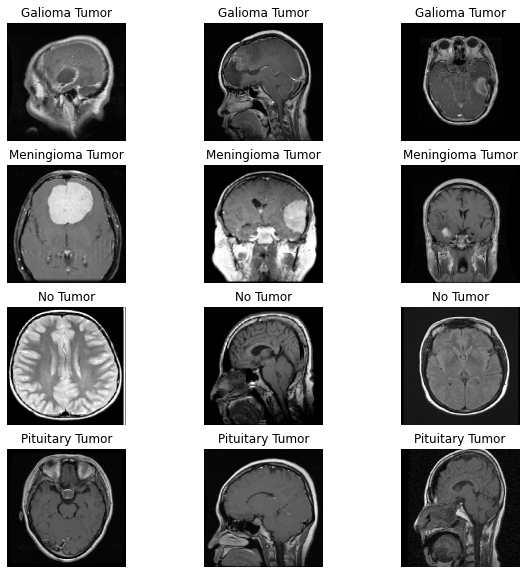

In [ ]:

# plotting 4 x 3 image matrix
fig = plt.figure(figsize = (10,10))

# Plotting three images from each of the four categories by looping through their path 
for i in range(12):
    if i < 3:
        fp = f'{DATADIR}/{CATEGORIES[0]}/{select_gal[i]}'                      # Here datadir is a path to the training data and categories[0] indicate the first label galioma tumor and here we are looping over to take the three random images that we have stored in select_galo variable 
        label = 'Galioma Tumor'                                                 
    if i>=3 and i<6:
        fp = f'{DATADIR}/{CATEGORIES[1]}/{select_menin[i-3]}'                  # Here datadir is a path to the training data and categories[1] indicate the second label meningioma tumor and here we are looping over to take the three random images that we have stored in select_menin variable 
        label = 'Meningioma Tumor' 
    if i>=6 and i<9:
        fp = f'{DATADIR}/{CATEGORIES[2]}/{select_no_t[i-6]}'                   # Here datadir is a path to the training data and categories[2] indicate the third label no tumor and here we are looping over to take the three random images that we have stored in select_no_t variable 
        label = 'No Tumor'
    if i>=9 and i<12:
        fp = f'{DATADIR}/{CATEGORIES[3]}/{select_pit[i-9]}'                    # Here datadir is a path to the training data and categories[3] indicate the forth label pituitary tumor and here we are looping over to take the three random images that we have stored in select_pit variable 
        label = 'Pituitary Tumor'
    ax = fig.add_subplot(4, 3, i+1)
    
    # Plotting each image using load_img function
    fn = image.load_img(fp, target_size = (150,150), color_mode='grayscale')
    plt.imshow(fn, cmap='Greys_r')
    plt.title(label)
    plt.axis('off')
plt.show()

### **Data Preprocessing** 

In [ ]:
# Creating two different lists to store the Numpy arrays and the corresponding labels
X_train = []                                                                   
y_train = []
np.random.shuffle(training_data)                                               # Shuffling data to reduce variance and making sure that model remains general and overfit less
for features,label in training_data:                                           # Iterating over the training data which is generated from the create_training_data() function 
    X_train.append(features)                                                   # Appending images into X_train
    y_train.append(label)                                                      # Appending labels into y_train

In [ ]:
# Creating two different lists to store the Numpy arrays and the corresponding labels
X_test = []
y_test = []

np.random.shuffle(testing_data)                                                # Shuffling data to reduce variance and making sure that model remains general and overfit less
for features,label in testing_data:                                            # Iterating over the training data which is generated from the create_testing_data() function
    X_test.append(features)                                                    # Appending images into X_train
    y_test.append(label)                                                       # Appending labels into y_train

In [ ]:
# Converting the list into DataFrame
y_train = pd.DataFrame(y_train, columns=["Label"],dtype=object) 
y_test = pd.DataFrame(y_test, columns=["Label"],dtype=object)

### **Exploratory Data Analysis**

In [ ]:
# Storing the value counts of target variable
tumortype_count=y_train.Label.value_counts()
print(tumortype_count)
print('*'*10)
tumortype_count=y_train.Label.value_counts(normalize=True)
print(tumortype_count)

meningioma_tumor    830
glioma_tumor        829
pituitary_tumor     827
no_tumor            395
Name: Label, dtype: int64
**********
meningioma_tumor    0.288094
glioma_tumor        0.287747
pituitary_tumor     0.287053
no_tumor            0.137105
Name: Label, dtype: float64


The above distribution shows that the given dataset is a balanced data.

In [ ]:
# Converting the pixel values into Numpy array
X_train= np.array(X_train) 
X_test= np.array(X_test) 

**NOTE**

Images are digitally respresented in the form of numpy arrays which can be observed from the X_train values generated above, so it is possible to perform all the preprocessing operations and build our CNN model using numpy arrays directly. So, even if the data is provided in the form of numpy arrays rather than images, we can use this to work on our model. 



**Finding the mean images** for each class of tumor: 

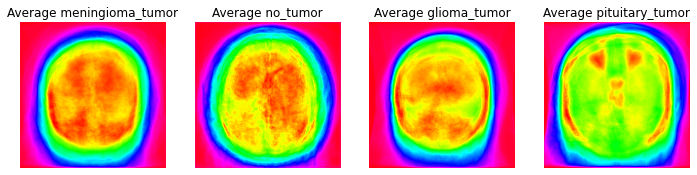

In [ ]:
# Creating a user defined function to calculate and plot the mean image of each category 
def find_mean_img(full_mat):
    mean_img = np.mean(full_mat, axis = 0)                                     # Taking the mean of pixel values for each category and storing in mean_img
    mean_img = mean_img.reshape((150,150))                                     # Reshaping the image to 150x150
  
    return mean_img

CATEGORIES=y_train['Label'].unique()                                           # Storing all the unique labels
d={ i:[] for i in CATEGORIES}                                                  # Here we are creating a dictionary with keys as unique categories and values as list for each category

for i in y_train.index:
  img = cv2.resize(X_train[i],(150,150))                                       # Reshaping the image to 150x150
  d[y_train['Label'][i]].append(img)                                           # Here we are appending each image of its category to its respective list in the dictionary

mean_img_list=[]
for i in d.keys():                                                             # Looping over each category from the keys in the dictionary and appeding the mean image of each category to the newly created list(mean_img_list)
  mean_img_list.append(find_mean_img(d[i]))

plt.subplots(figsize=(12,12))
for i in range(len(mean_img_list)):
    plt.subplot(3,4,i + 1,title='Average '+list(d.keys())[i])
    plt.imshow(mean_img_list[i], cmap='hsv_r')                                 # Here we are getting the image in different color to understand the difference between the mean image of all the 4 categories using cmap = hsv_r
    plt.axis('off')

From the above plot we can observe how the tumors of different categories differ from each other. 

Since the given data is stored in X_train, X_test,y_train, and y_test variables, there is no need to split the data further. 

**Normalizing the data**

In neural networks, it is always suggested to **normalize the feature inputs**. Normalization has the below benefits while training a neural networks model: 

1. **Normalization makes the training faster and reduces the chances of getting stuck at local optima.**
2. In deep neural networks, **normalization helps to avoid exploding gradient problems.** Gradient exploding problem occurs when large error gradients accumulate and result in very large updates to neural network model weights during training. This makes a model unstable and unable to learn from the training data.

As we know image pixel **values range from 0-255**, here we are simply **dividing all the pixel values by 255 to standardize all the images to have values between 0-1.**

In [ ]:
## Normalizing the image data 
X_train= X_train/255.0
X_test = X_test/255.0

### **Encoding Target Variable**

LabelBinarizer is another technique used to encode the target variables which reduces the sparsity as compared to one hot encoder. You can also look into the documentation [here](https://scikit-learn.org/stable/modules/generated/sklearn.preprocessing.LabelBinarizer.html).

For Example:
If we have 4 classes as "Good","Better","Okay","Bad". 
After applying LabelBinarizer on these 4 classes, the output result will be in the form of array.
* [1, 0, 0, 0] --------- Good
* [0, 1, 0, 0] --------- Better
* [0, 0, 1, 0] --------- Okay
* [0, 0, 0, 1] --------- Bad

Each class will be represented in the form of array




In [ ]:
from sklearn.preprocessing import LabelBinarizer
# Storing the LabelBinarizer function in lb variable
lb = LabelBinarizer() 
# Applying fit_transform on train target variable
y_train_e = lb.fit_transform(y_train)
# Applying only transform on test target variable
y_test_e = lb.transform(y_test)

### **Model Building** 

We will be using two types of Deep Neural Networks:

- **ANN** (Artificial Neural Network - fully connected)
- **CNN** (Convolutional Neural Network)

#### **ANN**

If you are creating many models in a loop, this global state will consume an increasing amount of memory over time, and you may want to clear it. Calling clear_session() releases the global state: this helps avoid clutter from old models and layers, especially when memory is limited.

In [ ]:
from tensorflow.keras import backend
backend.clear_session()
#Fixing the seed for random number generators so that we can ensure we receive the same output everytime
np.random.seed(42)
import random
random.seed(42)
tf.random.set_seed(42)

In [ ]:
# Defining the model
def create_model(): 
        # we will be adding the layers sequentially
        model_ann = keras.Sequential([
            # flattening the 3-d output of the conv layer and making it ready for creating dense connections
            keras.layers.Flatten(input_shape=(150,150,1)), 
            # first hidden layer with 500 neurons, kernel_initializer as 'he_uniform" and relu activation function
            keras.layers.Dense(500,kernel_initializer='he_uniform', activation=tf.nn.relu), 
            # second hidden layer with 700 neurons, kernel_initializer as 'he_uniform" and relu activation function
            keras.layers.Dense(700,kernel_initializer='he_uniform', activation=tf.nn.relu),
            # output layer with 4 neuron and softmax as activation function will give the probability of each class   
            keras.layers.Dense(4, kernel_initializer='random_uniform',activation=tf.nn.softmax)
        ])
        # Once we are done with the model architecture, we need to compile the model, where we need to provide the loss function that 
        # we want to optimize, the optimization algorithm, and the evaluation metric that we are interested in to evaluate the model.
        model_ann.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])
        return model_ann

In [ ]:
## Applying the function created above model_ann
model_ann=create_model()
model_ann.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 flatten (Flatten)           (None, 22500)             0         
                                                                 
 dense (Dense)               (None, 500)               11250500  
                                                                 
 dense_1 (Dense)             (None, 700)               350700    
                                                                 
 dense_2 (Dense)             (None, 4)                 2804      
                                                                 
Total params: 11,604,004
Trainable params: 11,604,004
Non-trainable params: 0
_________________________________________________________________


From the above summary, we can see that this architecture will train a total of **11,604,004** parameters i.e. weights and biases in the network.

**Training the model**

**Early stopping** is a technique similar to cross-validation where a part of training data is kept as the validation data. When the performance of the validation data starts worsening, the model will immediately stop the training.
- **Monitor**: Quantity to be monitored.
- **Mode**: One of {"auto", "min", "max"}. In min mode, training will stop when the quantity monitored has stopped decreasing; in "max" mode it will stop when the quantity monitored has stopped increasing; in "auto" mode, the direction is automatically inferred from the name of the monitored quantity.
- **Patience**: Number of epochs with no improvement after which training will be stopped.

**ModelCheckpoint** callback is used in conjunction with training using a model. fit() to save a model or weights (in a checkpoint file) at some interval, so the model or weights can be loaded later to continue the training from the state saved.

In [ ]:
#Train the model
from tensorflow.keras.callbacks import EarlyStopping,ModelCheckpoint

es = EarlyStopping(monitor='val_loss', mode='min', verbose=1, patience=20)
mc = ModelCheckpoint('best_model.h5', monitor='val_accuracy', mode='max', verbose=1, save_best_only=True)
# Fitting the model with epochs of 200, batch_size of 64 with a validation split of 0% and storing the metrics in history variable
history=model_ann.fit(X_train, y_train_e,  epochs=200, batch_size=64,validation_split=0.20,callbacks=[es, mc])

Epoch 1/200
32/36 [=========================>....] - ETA: 0s - loss: 485.5045 - accuracy: 0.2720
Epoch 1: val_accuracy improved from -inf to 0.28250, saving model to best_model.h5
36/36 [==============================] - 2s 29ms/step - loss: 445.4405 - accuracy: 0.2743 - val_loss: 126.6237 - val_accuracy: 0.2825
Epoch 2/200
36/36 [==============================] - ETA: 0s - loss: 58.1671 - accuracy: 0.2839
Epoch 2: val_accuracy did not improve from 0.28250
36/36 [==============================] - 1s 14ms/step - loss: 58.1671 - accuracy: 0.2839 - val_loss: 29.1566 - val_accuracy: 0.2496
Epoch 3/200
33/36 [==========================>...] - ETA: 0s - loss: 23.4495 - accuracy: 0.3149
Epoch 3: val_accuracy improved from 0.28250 to 0.28423, saving model to best_model.h5
36/36 [==============================] - 1s 22ms/step - loss: 22.5570 - accuracy: 0.3134 - val_loss: 25.9588 - val_accuracy: 0.2842
Epoch 4/200
35/36 [============================>.] - ETA: 0s - loss: 9.1483 - accuracy: 0.328

**Plotting Accuracy vs Epoch Curve**

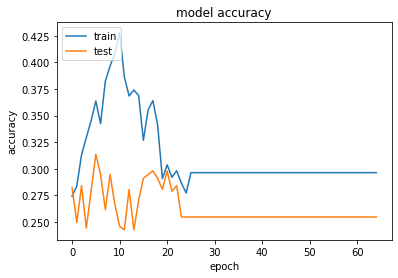

In [ ]:
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

In [ ]:
import numpy
model_ann.evaluate(X_test,y_test_e)

13/13 [==============================] - 0s 6ms/step - loss: 1.5117 - accuracy: 0.2836


[1.5117474794387817, 0.28358209133148193]

As we see here, the **ANN does not show a decent test accuracy**, and the accuracy plot seems to be overfitting the model since ANNs are unable to capture spatial correlation characteristics of the image. 

**Let's try Convolutional Neural Networks, which take in the whole image as a 2D matrix instead.** 
CNNs tend to behave well on image data but the important point to consider is, it may not be true until an optimized CNN is built depending on the data.

#### **Convolutional Neural Network (CNN)**

**Model 1:**

In [ ]:
from tensorflow.keras import backend
backend.clear_session()
#Fixing the seed for random number generators so that we can ensure we receive the same output everytime
np.random.seed(42)
import random
random.seed(42)
tf.random.set_seed(42)

* **Filters**: 256- Number of filters in the first hidden layer.This is also called as **Kernel**
* **Kernel_Size**: The kernel size here refers to the widthxheight of the filter mask. The kernel_size must be an odd integer as well. Typical values for kernel_size include: (1, 1) , (3, 3) , (5, 5) , (7, 7)
* **Padding**: The padding type is called SAME because the output size is the same as the input size(when stride=1). Using 'SAME' ensures that the filter is applied to all the elements of the input. Normally, padding is set to "SAME" while training the model. Output size is mathematically convenient for further computation.
* **MaxPool2D**: Max Pooling is a pooling operation that calculates the maximum value for patches of a feature map, and uses it to create a downsampled (pooled) feature map. It is usually used after a convolutional layer.
* **Flatten**: Flattening is converting the data into a 1-dimensional array for inputting it to the next layer. We flatten the output of the convolutional layers to create a single long feature vector. And it is connected to the final classification model, which is called a fully-connected layer.

In [ ]:
# initialized a sequential model
model_2 = Sequential()

# adding first conv layer with 256 filters and kernel size 5x5 , with ReLU activation and padding 'same' provides the output size same as the input size
#input_shape denotes input image dimension of images
model_2.add(Conv2D(filters = 256, kernel_size = (5,5),padding = 'Same', 
                 activation ='relu', input_shape = (150,150,1)))  # Shape of the image given to the model

# adding max pooling to reduce the size of output of first conv layer
model_2.add(MaxPool2D(pool_size=(2,2)))
#  adding dropout to randomly switch off 25% neurons to reduce overfitting
model_2.add(Dropout(0.25))

#  adding second conv layer with 128 filters and with kernel size 3x3 and ReLu activation function
model_2.add(Conv2D(filters = 128, kernel_size = (3,3),padding = 'Same', 
                 activation ='relu'))
# adding max pooling havinf pool_size and strides with (2,2) to reduce the size of output of second conv layer
model_2.add(MaxPool2D(pool_size=(2,2), strides=(2,2)))
#  adding dropout to randomly switch off 25% neurons to reduce overfitting
model_2.add(Dropout(0.25))

#  adding third conv layer with 128 filters and with kernel size 3x3 and ReLu activation function
model_2.add(Conv2D(filters = 128, kernel_size = (3,3),padding = 'Same', 
                 activation ='relu'))
# adding max pooling havinf pool_size and strides with (2,2) to reduce the size of output of third conv layer
model_2.add(MaxPool2D(pool_size=(2,2), strides=(2,2)))
#  adding dropout to randomly switch off 30% neurons to reduce overfitting
model_2.add(Dropout(0.3))

# adding fourth conv layer with 128 filters and with kernel size 2x2 and ReLu activation function
model_2.add(Conv2D(filters = 128, kernel_size = (2,2),padding = 'Same', 
                 activation ='relu'))
# adding max pooling havinf pool_size and strides with (2,2) to reduce the size of output of fourth conv layer
model_2.add(MaxPool2D(pool_size=(2,2), strides=(2,2)))
#  adding dropout to randomly switch off 30% neurons to reduce overfitting
model_2.add(Dropout(0.3))

# adding fifth conv layer with 128 filters and with kernel size 2x2 and ReLu activation function
model_2.add(Conv2D(filters = 128, kernel_size = (2,2),padding = 'Same', 
                 activation ='relu'))
# adding max pooling havinf pool_size and strides with (2,2) to reduce the size of output of fifth conv layer
model_2.add(MaxPool2D(pool_size=(2,2), strides=(2,2)))
#  adding dropout to randomly switch off 30% neurons to reduce overfitting
model_2.add(Dropout(0.3))

# flattening the 3-d output of the conv layer after max pooling to make it ready for creating dense connections
model_2.add(Flatten())
# adding a fully connected dense layer with 1024 neurons 
model_2.add(Dense(1024, activation = "relu"))
#  adding dropout to randomly switch off 50% neurons to reduce overfitting
model_2.add(Dropout(0.5))
# adding the output layer with 4 neurons and activation functions as softmax since this is a multi-class classification problem.
model_2.add(Dense(4, activation = "softmax"))

1. If the problem is having three classes to predict, then the neurons in the output layer will be 3. 

**model.add(Dense(3,activation = "softmax")**

2. If the problem is having three classes to predict, then the neurons in the output layer will be 10. 

**model.add(Dense(10,activation = "softmax")**

In [ ]:
# printing the model summary
model_2.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 150, 150, 256)     6656      
                                                                 
 max_pooling2d (MaxPooling2D  (None, 75, 75, 256)      0         
 )                                                               
                                                                 
 dropout (Dropout)           (None, 75, 75, 256)       0         
                                                                 
 conv2d_1 (Conv2D)           (None, 75, 75, 128)       295040    
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 37, 37, 128)      0         
 2D)                                                             
                                                                 
 dropout_1 (Dropout)         (None, 37, 37, 128)       0

As we can see from the above summary, this CNN model will train and learn **2,682,884 parameters (weights and biases).**

Let's now compile and train the model using the train data. Here, we are using the loss function - categorical_crossentropy as this is a multi-class classification problem. We will try to minimize this loss at every iteration using the optimizer of our choice. Also, we are choosing accuracy as the metric to measure the performance of the model.

In [ ]:
# Taking Adam as an optimizer with learning rate 0.001
optimizer = Adam(lr=0.001)
# Compiling the model with Adam as optimizer, categorical_crossentropy as loss function and accuracy as metrics
model_2.compile(optimizer = optimizer , loss = "categorical_crossentropy", metrics=["accuracy"])
es = EarlyStopping(monitor='val_loss', mode='min', verbose=1, patience=5)
mc = ModelCheckpoint('best_model.h5', monitor='val_accuracy', mode='max', verbose=1, save_best_only=True)
# Fitting the model with 30 epochs and validation_split as 20%
history=model_2.fit(X_train, 
          y_train_e,  
          epochs=30, 
          batch_size=64,validation_split=0.20,callbacks=[es, mc])  

/usr/local/lib/python3.7/dist-packages/keras/optimizer_v2/adam.py:105: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


Epoch 1/30
36/36 [==============================] - ETA: 0s - loss: 1.2746 - accuracy: 0.4002
Epoch 1: val_accuracy improved from -inf to 0.58579, saving model to best_model.h5
36/36 [==============================] - 34s 570ms/step - loss: 1.2746 - accuracy: 0.4002 - val_loss: 1.1271 - val_accuracy: 0.5858
Epoch 2/30
36/36 [==============================] - ETA: 0s - loss: 0.9905 - accuracy: 0.5673
Epoch 2: val_accuracy improved from 0.58579 to 0.61005, saving model to best_model.h5
36/36 [==============================] - 20s 552ms/step - loss: 0.9905 - accuracy: 0.5673 - val_loss: 0.8817 - val_accuracy: 0.6101
Epoch 3/30
36/36 [==============================] - ETA: 0s - loss: 0.8032 - accuracy: 0.6680
Epoch 3: val_accuracy improved from 0.61005 to 0.65165, saving model to best_model.h5
36/36 [==============================] - 20s 553ms/step - loss: 0.8032 - accuracy: 0.6680 - val_loss: 0.8072 - val_accuracy: 0.6516
Epoch 4/30
36/36 [==============================] - ETA: 0s - loss:

**Plotting Accuracy vs Epoch Curve**

dict_keys(['loss', 'accuracy', 'val_loss', 'val_accuracy'])


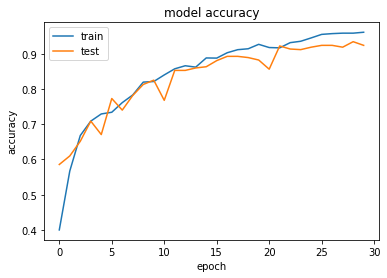

In [ ]:
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

In [ ]:
model_2.evaluate(X_test,(y_test_e))

13/13 [==============================] - 3s 143ms/step - loss: 3.7472 - accuracy: 0.7114


[3.747220516204834, 0.711442768573761]

Here we can observe that CNN is performing better than ANN but we will try to optimize this model and see if we can improve its performance(Accuracy).

In [ ]:
# Test Prediction 
y_test_pred_ln2 = model_2.predict(X_test)
y_test_pred_classes_ln2 = np.argmax(y_test_pred_ln2, axis=1)
normal_y_test = np.argmax(y_test_e, axis=1)

Since we have converted the target variable into a NumPy array using labelbinarizer, now we are converting the target variable into its original form by using the numpy. argmax() function which returns indices of the max element of the array in a particular axis and this original form of target will be used in calculating the accuracy, and plotting the confusion matrix.

In [ ]:
# Test Accuracy 
import seaborn as sns
from sklearn.metrics import accuracy_score, confusion_matrix
accuracy_score((normal_y_test), y_test_pred_classes_ln2)

0.7114427860696517

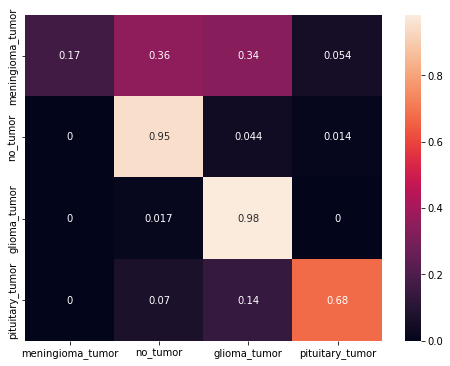

In [ ]:
cf_matrix = confusion_matrix(normal_y_test, y_test_pred_classes_ln2)

# Confusion matrix normalized per category true value
cf_matrix_n1 = cf_matrix/np.sum(cf_matrix, axis=1)
plt.figure(figsize=(8,6))
sns.heatmap(cf_matrix_n1, xticklabels=CATEGORIES, yticklabels=CATEGORIES, annot=True)

* The model is giving about 72% accuracy on the test data
* The model is majorly confused between 
 
  **meningioma_tumor and no_tumor**

  **meningioma_tumor and glioma_tumor**

### Model 2:

Lets try to build another CNN model with two more layers added to the model.

In [ ]:
from tensorflow.keras import backend
backend.clear_session()
#Fixing the seed for random number generators so that we can ensure we receive the same output everytime
np.random.seed(42)
import random
random.seed(42)
tf.random.set_seed(42)

In [ ]:
# initialized a sequential model
model_3 = Sequential()
# adding first conv layer with 256 filters and kernel size 5x5 , with ReLU activation and padding 'same' provides the output size same as the input size
#input_shape denotes input image dimension of images
model_3.add(Conv2D(filters = 256, kernel_size = (5,5),padding = 'Same', 
                 activation ='relu', input_shape = (150,150,1)))
# adding max pooling to reduce the size of output of first conv layer
model_3.add(MaxPool2D(pool_size=(2,2)))
#  adding dropout to randomly switch off 25% neurons to reduce overfitting
model_3.add(Dropout(0.25))


# adding second conv layer with 256 filters and with kernel size 3x3 and ReLu activation function
model_3.add(Conv2D(filters = 256, kernel_size = (5,5),padding = 'Same', 
                 activation ='relu'))
# adding max pooling to reduce the size of output of first conv layer
model_3.add(MaxPool2D(pool_size=(2,2), strides=(2,2)))
#  adding dropout to randomly switch off 25% neurons to reduce overfitting
model_3.add(Dropout(0.25))

# adding third conv layer with 256 filters and with kernel size 3x3 and ReLu activation function
model_3.add(Conv2D(filters = 128, kernel_size = (3,3),padding = 'Same', 
                 activation ='relu'))
# adding max pooling to reduce the size of output of first conv layer
model_3.add(MaxPool2D(pool_size=(2,2), strides=(2,2)))
#  adding dropout to randomly switch off 30% neurons to reduce overfitting
model_3.add(Dropout(0.3))

# adding forth conv layer with 256 filters and with kernel size 3x3 and ReLu activation function
model_3.add(Conv2D(filters = 128, kernel_size = (3,3),padding = 'Same', 
                 activation ='relu'))
# adding max pooling to reduce the size of output of first conv layer
model_3.add(MaxPool2D(pool_size=(2,2), strides=(2,2)))
#  adding dropout to randomly switch off 30% neurons to reduce overfitting
model_3.add(Dropout(0.3))

# adding fifth conv layer with 256 filters and with kernel size 3x3 and ReLu activation function
model_3.add(Conv2D(filters = 128, kernel_size = (3,3),padding = 'Same', 
                 activation ='relu'))
# adding max pooling to reduce the size of output of first conv layer
model_3.add(MaxPool2D(pool_size=(2,2), strides=(2,2)))
#  adding dropout to randomly switch off 30% neurons to reduce overfitting
model_3.add(Dropout(0.3))

#
model_3.add(Conv2D(filters = 64, kernel_size = (2,2),padding = 'Same', 
                 activation ='relu'))
model_3.add(MaxPool2D(pool_size=(2,2), strides=(2,2)))
model_3.add(Dropout(0.3))

#
model_3.add(Conv2D(filters = 64, kernel_size = (2,2),padding = 'Same', 
                 activation ='relu'))
model_3.add(MaxPool2D(pool_size=(2,2), strides=(2,2)))
model_3.add(Dropout(0.3))

# flattening the 3-d output of the conv layer after max pooling to make it ready for creating dense connections
model_2.add(Flatten())
# adding first fully connected dense layer with 1024 neurons 
model_2.add(Dense(1024, activation = "relu"))
#  adding dropout to randomly switch off 50% neurons to reduce overfitting
model_3.add(Dropout(0.5))
# adding second fully connected dense layer with 512 neurons 
model_3.add(Dense(512, activation = "relu"))
#  adding dropout to randomly switch off 50% neurons to reduce overfitting
model_3.add(Dropout(0.5))

# adding the output layer with 4 neurons and activation functions as softmax since this is a multi-class classification problem with 4 classes.
model_3.add(Dense(4, activation = "softmax"))

In [ ]:
model_3.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_5 (Conv2D)           (None, 150, 150, 256)     6656      
                                                                 
 max_pooling2d_5 (MaxPooling  (None, 75, 75, 256)      0         
 2D)                                                             
                                                                 
 dropout_6 (Dropout)         (None, 75, 75, 256)       0         
                                                                 
 conv2d_6 (Conv2D)           (None, 75, 75, 256)       1638656   
                                                                 
 max_pooling2d_6 (MaxPooling  (None, 37, 37, 256)      0         
 2D)                                                             
                                                                 
 dropout_7 (Dropout)         (None, 37, 37, 256)      

As we can see from the above summary, this CNN model will train and learn **2,878,212 parameters (weights and biases).**

Let's now compile and train the model using the train data. Here, we are using the loss function - categorical_crossentropy as this is a multi-class classification problem. We will try to minimize this loss at every iteration using the optimizer of our choice. Also, we are choosing accuracy as the metric to measure the performance of the model.

In [ ]:
optimizer = Adam(lr=0.001)
model_3.compile(optimizer = optimizer , loss = "categorical_crossentropy", metrics=["accuracy"])
es = EarlyStopping(monitor='val_loss', mode='min', verbose=1, patience=5)
mc = ModelCheckpoint('best_model.h5', monitor='val_accuracy', mode='max', verbose=1, save_best_only=True)

history=model_3.fit(X_train, 
          y_train_e,  
          epochs=30, 
          batch_size=64,validation_split=0.20,callbacks=[es, mc],use_multiprocessing=True)

/usr/local/lib/python3.7/dist-packages/keras/optimizer_v2/adam.py:105: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


Epoch 1/30
36/36 [==============================] - ETA: 0s - loss: 1.3619 - accuracy: 0.2847
Epoch 1: val_accuracy improved from -inf to 0.28596, saving model to best_model.h5
36/36 [==============================] - 35s 760ms/step - loss: 1.3619 - accuracy: 0.2847 - val_loss: 1.3540 - val_accuracy: 0.2860
Epoch 2/30
36/36 [==============================] - ETA: 0s - loss: 1.3412 - accuracy: 0.3051
Epoch 2: val_accuracy did not improve from 0.28596
36/36 [==============================] - 26s 735ms/step - loss: 1.3412 - accuracy: 0.3051 - val_loss: 1.3243 - val_accuracy: 0.2860
Epoch 3/30
36/36 [==============================] - ETA: 0s - loss: 1.2285 - accuracy: 0.4262
Epoch 3: val_accuracy improved from 0.28596 to 0.44021, saving model to best_model.h5
36/36 [==============================] - 27s 742ms/step - loss: 1.2285 - accuracy: 0.4262 - val_loss: 1.1424 - val_accuracy: 0.4402
Epoch 4/30
36/36 [==============================] - ETA: 0s - loss: 1.0845 - accuracy: 0.4740
Epoch 4:

**Plotting Accuracy vs Epoch Curve**

dict_keys(['loss', 'accuracy', 'val_loss', 'val_accuracy'])


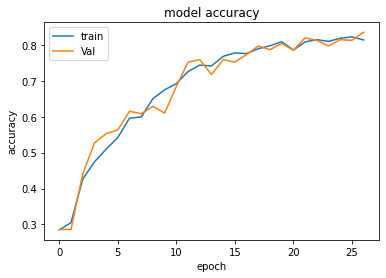

In [ ]:
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'Val'], loc='upper left')
plt.show()

Train and Validation accuracy seems fine and let's calculate the accuracy on the test data

In [ ]:
model_3.evaluate(X_test,y_test_e)

13/13 [==============================] - 4s 205ms/step - loss: 2.5746 - accuracy: 0.4353


[2.5745885372161865, 0.4353233873844147]

By comparing the train and test accuracy, it seems the model is overfitting, so adding more layers to the model is not working, and we can say that the previous CNN model is good. We can also try building different models by decreasing the hidden layers from the first CNN model and see if we get good accuracy.

In [ ]:
y_test_pred_ln3 = model_3.predict(X_test)
y_test_pred_classes_ln3 = np.argmax(y_test_pred_ln3, axis=1)

In [ ]:
import seaborn as sns
from sklearn.metrics import accuracy_score, confusion_matrix
accuracy_score(normal_y_test, y_test_pred_classes_ln3)

0.43532338308457713

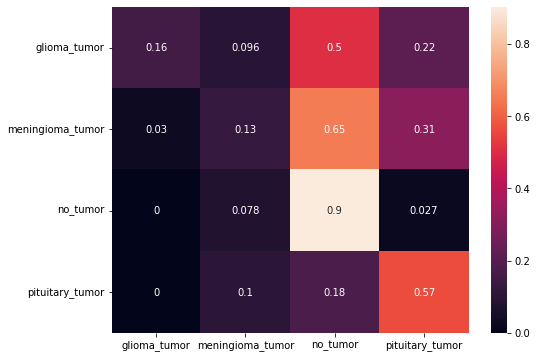

In [ ]:
cf_matrix = confusion_matrix(normal_y_test, y_test_pred_classes_ln3)

# Confusion matrix normalized per category true value
cf_matrix_n1 = cf_matrix/np.sum(cf_matrix, axis=1)
plt.figure(figsize=(8,6))
sns.heatmap(cf_matrix_n1, xticklabels=CATEGORIES, yticklabels=CATEGORIES, annot=True)

**Classification Report for each class** 

- **Precision:** precision is the fraction of relevant instances among the retrieved instances.

- **Recall:** recall is the fraction of relevant instances that were retrieved.

- **F-beta score:** The F-beta score is the weighted harmonic mean of precision and recall, reaching its optimal value at 1 and its worst value at 0. The beta parameter determines the weight of recall in the combined score.



The order of printing the above metrices for each class is as follows:

- **Glioma Tumor**
- **Meningioma Tumor**
- **Non Tumor**
- **Pituitary Tumor**



**CNN Model 1**

In [ ]:
from sklearn.metrics import precision_recall_fscore_support  

p=precision_recall_fscore_support(normal_y_test, y_test_pred_classes_ln2, average=None,labels=list(np.unique(normal_y_test)))

print(" Precision is {}\n Recall is {} \n f_beta Score is {}".format(p[0],p[1],p[2]))

 Precision is [1.         0.68125    0.65294118 0.90909091]
 Recall is [0.17       0.94782609 0.98230088 0.67567568] 
 f_beta Score is [0.29059829 0.79272727 0.7844523  0.7751938 ]


**CNN Model 2**

In [ ]:

from sklearn.metrics import precision_recall_fscore_support  

p=precision_recall_fscore_support(np.array(normal_y_test), y_test_pred_classes_ln3, average=None,labels=list(np.unique(normal_y_test)))


print(" Precision is {}\n Recall is {} \n f_beta Score is {}".format(p[0],p[1],p[2]))

 Precision is [0.84210526 0.31914894 0.40316206 0.5060241 ]
 Recall is [0.16       0.13043478 0.90265487 0.56756757] 
 f_beta Score is [0.26890756 0.18518519 0.55737705 0.53503185]


**CNN Model 1 (Best) Observation**

As we see from the precision for each class, the Glioma tumor classifier has the highest precision. But here, **we are more concerned about the case where a person who has a tumor is wrongly classified as belonging to the non-tumor category (False Negative).** 

It is giving the test accuracy of **72%** and from confusion matrix we can see that **36% of the persons belonging to Meningioma Tumor and 17% belonging to Glioma Tumor are not identified correctly, and the model predicts that they don't have a tumor at all** - which shows that our model does not do well in identifying glioma and meningioma tumors. But it works well for the other scenario, where the model is able to correctly identify those scans that do not not show a tumor. 

---



### **Prediction**

Let us predict with the best model with is model_2 by plotting one random image from X_test data with variable and see if our best model is predicting the image correctly or not.

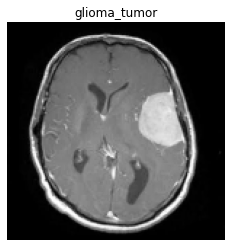

In [ ]:
# Plotting the test image 
plt.imshow(X_test[1].reshape(150,150), cmap='Greys_r')
i=y_test.Label[1]
i=np.argmax(i)
if(i == 0):
    plt.title("glioma_tumor")
if(i==1):
    plt.title("meningioma_tumor")
if(i==2):
    plt.title("no_tumor")
if(i==3):
    plt.title("pituitary_tumor")

plt.axis('off')
plt.show()

In [ ]:
# Predicting the test image with the best model and storing the prediction value in res variable
res=model_2.predict(X_test[1].reshape(1,150,150))

In [ ]:
# Applying argmax on the prediction to get the highest index value
i=np.argmax(res)
if(i == 0):
    print("glioma_tumor")
if(i==1):
    print("meningioma_tumor")
if(i==2):
    print("no_tumor")
if(i==3):
    print("pituitary_tumor")


glioma_tumor


**CNN Model 1** was able to predict the test image correctly with test accuracy of **72%**.

### **Conclusion**

1. As we have seen, **ANNs do not work well with image data**, because ANNs do not take 2-D images as input. They flatten the image and make it lose its spatial struture, whereas CNNs take the full 2D-image as input in order to perform feature extraction. So **CNNs do not lose the image's spatial structure, which makes them more suitable for working with image datasets.**

2. **There is still scope for improvement in the test accuracy of the CNN model** chosen here. **Different architectures** can be built and **hyperparamter tuning** can be performed to obtain a better brain tumor classifier. 

3. So, if we improve this model to get a higher test accuracy and check through confusion matrix if the cases of False Negative are low then this could be sucessfully use by the doctors to analyze and classify the tumors at an early stage. 


#### Things to try



1. Try to improve the best model (CNN model-1) by changing the hyperparameters such as 
- Number of filters
- Filter size 
- Activation function
- Dropout ratio 
and see if you can increase accuracy. 

2. You can even try to implement applying Gaussian blur to reduce the noise in the image. You can refer to the below code to understand how to apply Gaussian blur to images. 







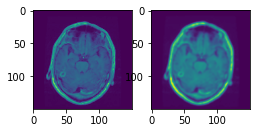

# CLEANED IMAGES


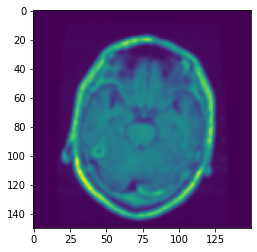

In [ ]:
new_train = []
sets = []; getEx = True
for i in X_train:
    blurr = cv2.GaussianBlur(i,(5,5),0)   ## Applying Gaussian Blur to each image
    new_train.append(blurr)                # Appending the blurred image to new_train variable
    if getEx:
      plt.subplot(2,3,1);plt.imshow(i) # plotting the ORIGINAL IMAGE
      plt.subplot(2,3,2);plt.imshow(blurr) # plotting the BLURRED IMAGE
      plt.show()
      getEx = False
new_train = np.asarray(new_train)
print("# CLEANED IMAGES")
#for i in range(4):
plt.imshow(new_train[0])  ## PRE-PROCESSED IMAGE